Import the libraries

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

import sdeint
from scipy.integrate import solve_ivp

from tqdm import tqdm

First, try the first example from the sdeint library

In [9]:
a = 1.0
b = 0.8
tspan = np.linspace(0.0, 5.0, 5001)
x0 = 0.1

def f(x, t):
    return -(a + x*b**2)*(1 - x**2)

def g(x, t):
    return b*(1 - x**2)

result = sdeint.itoint(f, g, x0, tspan)

Generate 100 simulations and plot the average

In [20]:
result_avg = np.empty((5001,100))
for i in tqdm(range(100)):
    result_avg[:,i] = sdeint.itoint(f, g, x0, tspan).ravel()

100%|██████████| 100/100 [00:23<00:00,  4.24it/s]


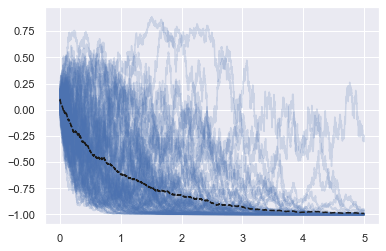

In [29]:
plt.plot(tspan, result_avg,'b', alpha = 0.2)
plt.plot(tspan, np.mean(result_avg, axis = 1),'k--', alpha = 1);

Repeat, but removing stochasticity by setting b = 0

100%|██████████| 100/100 [00:22<00:00,  4.48it/s]


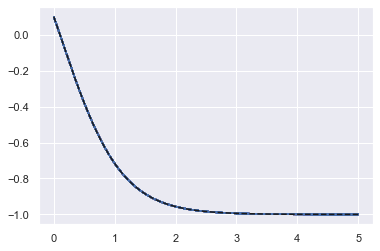

In [31]:
a = 1.0
b = 0.0
tspan = np.linspace(0.0, 5.0, 5001)
x0 = 0.1

def f(x, t):
    return -(a + x*b**2)*(1 - x**2)

def g(x, t):
    return b*(1 - x**2)

result_avg = np.empty((5001,100))
for i in tqdm(range(100)):
    result_avg[:,i] = sdeint.itoint(f, g, x0, tspan).ravel()

plt.plot(tspan, result_avg,'b', alpha = 0.2)
plt.plot(tspan, np.mean(result_avg, axis = 1),'k--', alpha = 1);

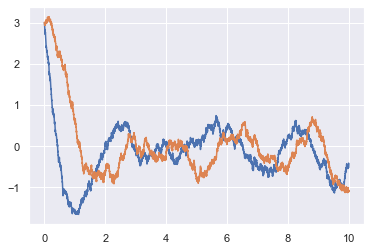

In [120]:
A = np.array([[-0.5, -2.0],
              [ 2.0, -1.0]])

B = np.diag([0.5, 0.5]) # diagonal, so independent driving Wiener processes

tspan = np.linspace(0.0, 10.0, 10001)
x0 = np.array([3.0, 3.0])

def f(x, t):
    return A.dot(x)

def G(x, t):
    return B

result = sdeint.itoint(f, G, x0, tspan)

plt.plot(tspan, result)
plt.show()

# Building $\Lambda$-$\Omega$ systems 

The general formulation of Lambda-Omega systems is:

$\frac{dx}{dt} = \Lambda(r)x - \Omega(r)y$

$\frac{dy}{dt} = \Omega(r)x + \Lambda(r)y$

with $r^2 = x^2 + y^2$, $\Lambda(r) = \lambda - b r^2$ and $\Omega(r) = \omega - ar^2$

Upon replacement, the system in cartesian coordinates is:

$\frac{dx}{dt} = \lambda x - b (x^3 + xy^2) - \omega y - a (yx^2 + y^3)$

$\frac{dy}{dt} = \omega x - a (x^3 + xy^2) + \lambda y - b (yx^2 + y^3)$

if we want to transform these equations to stochastic differential equations, we rewrite the equations as:

$dx = F_x dt + B_x dW(t)$

$dy = F_y dt + B_y dW(t)$

with:

$F_x = \lambda x - b x^3 -b xy^2 - \omega y - a yx^2 - y^3$ 

and 

$F_y = \omega x - a x^3 - a xy^2 + \lambda y - b yx^2 - y^3$




In [168]:
def close(func, *args):
    def newfunc(x, t):
        return func(x, t, *args)
    return newfunc

def F(X, t, l, o, a, b):
    
    x = X[0]
    y = X[1]
    
    r2 = x**2 + y**2
    
    dx = x*(l - b*r2) - y*(o + a*r2)
    dy = x*(o + a*r2) + y*(l - b*r2)
    
    return np.array([dx, dy])

def G(X, t):
    return B

tspan = np.linspace(0.0, 30.0, 30001)
X0 = np.array([0.005, 0.0])

l = 1
o = 1
a = 1
b = 1
params = [l, o, a, b]

sigma = 0.1
B = np.diag([sigma, 0.0])

result = sdeint.itoint(close(F,*params) , G, X0, tspan)

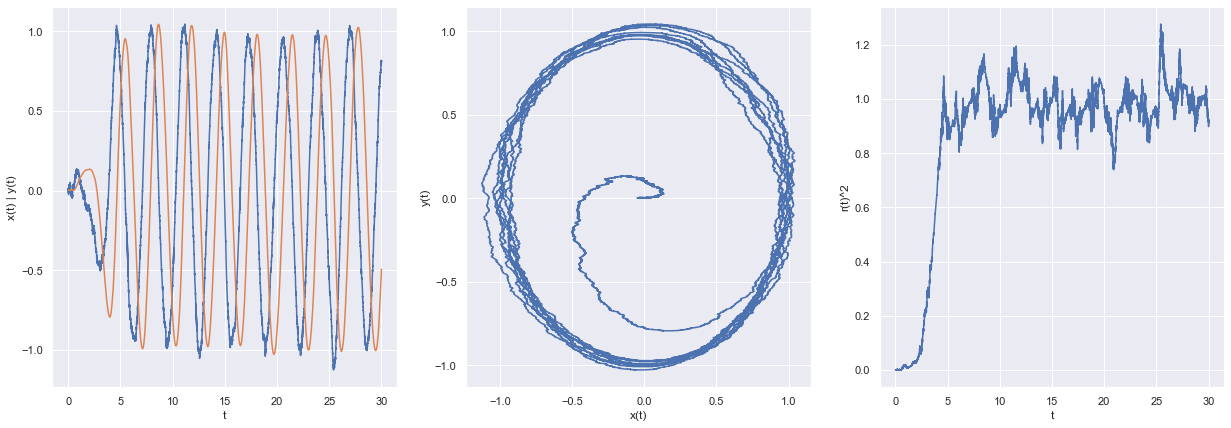

In [170]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(21,7))

#X,Y vs t
ax[0].plot(tspan, result)
ax[0].set(xlabel = 't', ylabel = 'x(t) | y(t)')
ax[1].plot(result[:,0],result[:,1])
ax[1].set(xlabel = 'x(t)', ylabel = 'y(t)')
ax[2].plot(tspan, result[:,0]**2 + result[:,1]**2)
ax[2].set(xlabel = 't', ylabel = 'r(t)^2')

plt.show()

In [158]:
plt.subplots?